In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
data= pd.ExcelFile('/content/xlwt example.xls')
do=pd.ExcelFile('/content/Output.xls')
X = pd.read_excel(data)
Y=pd.read_excel(do)
X_train= X.iloc[0:40000]
X_val=X.iloc[40000:50000]
Y_train=Y.iloc[0:40000]
Y_val=Y.iloc[40000:50000]
X_test=X.iloc[50000:]
Y_test=Y.iloc[50000:]

#X=np.array(X)
#Y=np.array(Y)
X_train= X[0:40000]
X_val=X[40000:50000]
Y_train=Y[0:40000]
Y_val=Y[40000:50000]
X_test=X[50000:]
Y_test=Y[50000:]

X_min_max_scaled = X.copy()
#apply normalization techniques
for column in X_min_max_scaled.columns:
    X_min_max_scaled[column] = (X_min_max_scaled[column] - X_min_max_scaled[column].min()) / (X_min_max_scaled[column].max() - X_min_max_scaled[column].min())     
# view normalized data
print(X_min_max_scaled)



normalized_X = preprocessing.normalize(X)
X_train= normalized_X[0:15000]
X_test=normalized_X[19000:]
Y_train=Y[0:15000]
Y_test=Y[19000:]
X_val=normalized_X[15000:19000]
Y_val=Y[15000:19000]

X_train= X_min_max_scaled.iloc[0:40000]
X_val=X_min_max_scaled.iloc[40000:50000]
Y_train=Y.iloc[0:40000]
Y_val=Y.iloc[40000:50000]
X_test=X_min_max_scaled.iloc[50000:]
Y_test=Y.iloc[50000:]

# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.4)



           u_l       p_l      v_l      u_r       p_r      v_r
0      0.29395  0.728219  0.42400  0.49475  0.865469  0.77105
1      0.49025  0.822853  0.35555  0.26350  0.022790  0.07110
2      0.49050  0.427234  0.91025  0.12045  0.763938  0.78210
3      0.66840  0.434435  0.10885  0.00845  0.654347  0.28790
4      0.47095  0.844607  0.90560  0.72185  0.371754  0.50180
...        ...       ...      ...      ...       ...      ...
59995  0.29600  0.205951  0.98610  0.82670  0.232762  0.25750
59996  0.74555  0.044187  0.53170  0.70585  0.487785  0.55265
59997  0.45730  0.212672  0.87135  0.77815  0.001450  0.80770
59998  0.89850  0.647137  0.64980  0.06225  0.584516  0.27615
59999  0.20455  0.272681  0.22345  0.51985  0.924189  0.38735

[60000 rows x 6 columns]


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import LeakyReLU
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor



In [ ]:

np.random.seed(0)

In [ ]:
NN_model = Sequential()


In [ ]:
NN_model.add(Dense(6, kernel_initializer='normal',input_dim = X_train.shape[1], activation='LeakyReLU'))
#input_dim=len(X_train[1])

In [ ]:
NN_model.add(Dense(120, kernel_initializer='normal',activation='LeakyReLU'))
#NN_model.add(Dense(120, kernel_initializer='normal',activation='LeakyReLU'))
# NN_model.add(Dropout(0.2))
#NN_model.add(Dense(96, kernel_initializer='normal',activation='LeakyReLU'))


In [ ]:
NN_model.add(Dense(3, kernel_initializer='normal',activation='linear'))

In [ ]:
NN_model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['accuracy'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 120)               840       
                                                                 
 dense_2 (Dense)             (None, 3)                 363       
                                                                 
Total params: 1,245
Trainable params: 1,245
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

In [ ]:
#Training the model
with tf.device('/device:GPU:0'):
  history=NN_model.fit(X_train,Y_train, epochs=75, batch_size=32, callbacks=(callbacks_list,es), validation_data=(X_val,Y_val))

Epoch 1/75
1233/1250 [============================>.] - ETA: 0s - loss: 0.0159 - accuracy: 0.9767
Epoch 00001: val_loss improved from 0.01754 to 0.01511, saving model to Weights-001--0.01511.hdf5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0159 - accuracy: 0.9766 - val_loss: 0.0151 - val_accuracy: 0.9780
Epoch 2/75
1243/1250 [============================>.] - ETA: 0s - loss: 0.0149 - accuracy: 0.9762
Epoch 00002: val_loss improved from 0.01511 to 0.01448, saving model to Weights-002--0.01448.hdf5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0149 - accuracy: 0.9763 - val_loss: 0.0145 - val_accuracy: 0.9780
Epoch 3/75
1235/1250 [============================>.] - ETA: 0s - loss: 0.0142 - accuracy: 0.9771
Epoch 00003: val_loss improved from 0.01448 to 0.01353, saving model to Weights-003--0.01353.hdf5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0142 - accuracy: 0.9772 - val_loss: 0.0135 - val_accuracy: 0.9788
Epoch 4/75
12

In [ ]:
# Call evaluate to find the accuracy on test images
test_loss, test_accuracy = NN_model.evaluate(
  x = X_test, 
  y = Y_test
)
 
print("Test Loss: %.4f"%test_loss)
print("Test Accuracy: %.4f"%test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9866
Test Loss: 0.0049
Test Accuracy: 0.9866


In [ ]:
# # Load wights file of the best model :
# print(callbacks_list)

# wights_file = 'Weights-146--0.00042.hdf5'
# # wights_file = 'Weights-084--1.14355.hdf5' # choose the best checkpoint 
# NN_model.load_weights(wights_file) # load it
# NN_model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['accuracy'])

In [ ]:
NN_model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7faf4e14cdd0>>

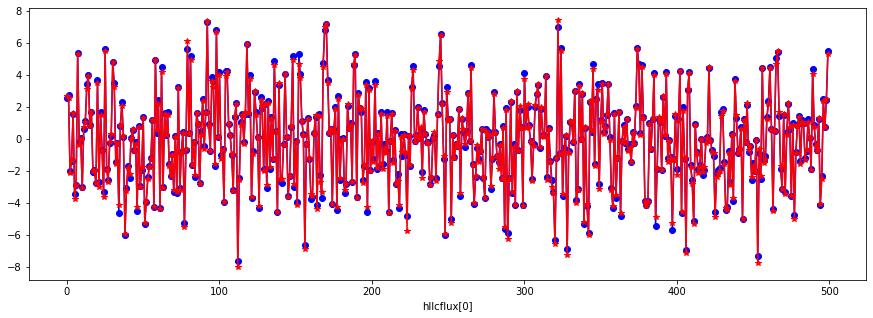

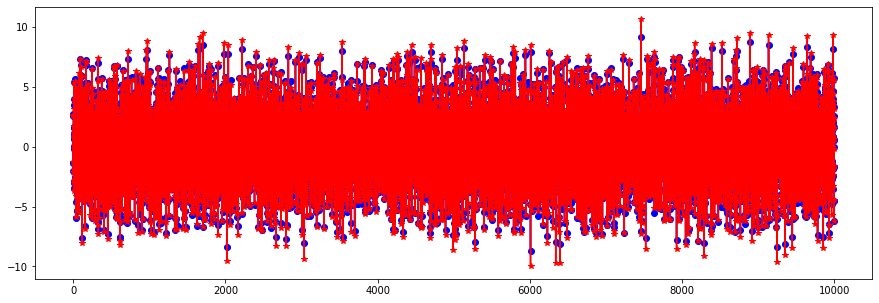

In [ ]:
predictions = NN_model.predict(X_test)
l=[]
pred=predictions[0:500]
length=len(pred)
for i in range(0,length):
  l.append(i)
y=Y_test[0:500]
pred_train=NN_model.predict(X_train)
plt.figure(figsize=[15,5]);

plt.plot(l,pred[:,0],'-o',color='blue')
plt.plot(l,y['hllcflux[0]'],'-*', color='red')
plt.xlabel('hllcflux[0]')
plt.show()
k=[]
for i in range(0,len(predictions)):
  k.append(i)
plt.figure(figsize=[15,5]);
plt.plot(k,predictions[:,0],'-o',color='blue')
plt.plot(k,Y_test['hllcflux[0]'],'-*', color='red')


In [ ]:
print (predictions)
print (Y_test)

[[ 1.9318154   0.28971517 -0.17464384]
 [ 3.8859851  -1.7903174   0.11753724]
 [ 3.4067545  -1.0973718   0.28225377]
 ...
 [-2.4431353  -0.82898486 -0.1952478 ]
 [ 2.085193   -0.39375946 -0.05730503]
 [-2.6304712  -2.5379553   0.65149033]]
       hllcflux[0]  hllcflux[1]  hllcflux[2]
50000     1.967672     0.266058    -0.243418
50001     3.897104    -1.853355     0.074708
50002     3.459547    -1.110391     0.225584
50003    -0.950066    -1.290402     0.313920
50004    -1.985988    -0.363761    -0.125862
...            ...          ...          ...
59995    -4.208416     1.189410     0.463253
59996     0.449950     2.868346     0.107820
59997    -2.353772    -0.846614    -0.203773
59998     1.965051    -0.382992    -0.076687
59999    -2.514317    -2.478378     0.679592

[10000 rows x 3 columns]


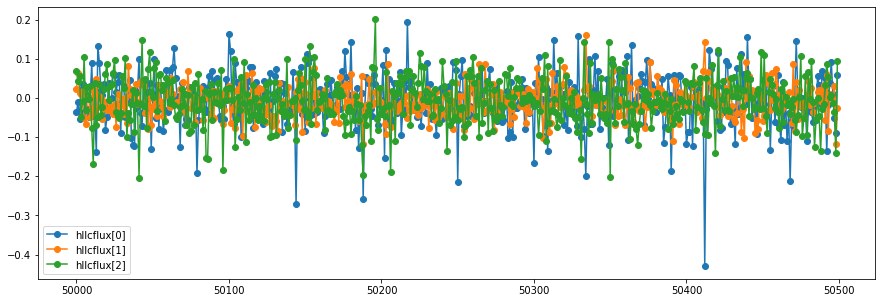

In [ ]:

plt.figure(figsize=[15,5])
plt.plot(pred[:,0]-y['hllcflux[0]'],'o-',label='hllcflux[0]') #blue
plt.plot(pred[:,1]-y['hllcflux[1]'],'o-',label='hllcflux[1]')  #yellow
plt.plot(pred[:,2]-y['hllcflux[2]'],'o-',label='hllcflux[2]')  # green
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score
 
k=r2_score(Y_test,predictions)
print('r_square',k)
from sklearn.metrics import mean_squared_error
from math import sqrt
for i in range(0,3):
  s='hllcflux['+str(i)+']'
  t_est_1=sqrt(mean_squared_error(Y_test[s], predictions[:,i]))
  print (s,t_est_1)
#calculate RMSE
t_est=sqrt(mean_squared_error(Y_test, predictions)) #smaller rmse values - better fit
t_rain= sqrt(mean_squared_error(Y_train, pred_train))
print (t_est)
print(t_rain)

r_square 0.9927221136440063
hllcflux[0] 0.07198866905376743
hllcflux[1] 0.04013742295323799
hllcflux[2] 0.057202004706685725
0.05792365819456867
0.0574720472147962


In [ ]:
TS= pd.ExcelFile('/content/testing sample.xls')
ts = pd.read_excel(TS)
# ts=np.array(ts)

In [ ]:

with tf.device('/device:GPU:0'):
  import time
  starttime=time.time()
  NN_model.predict(ts)#[u_l,p_l,v_l,u_r,p_r,v_r]
  endtime=time.time()
  print(endtime-starttime)


3.075833320617676


In [ ]:
import time
starttime=time.time()
NN_model.predict(X)
endtime=time.time()
print(endtime-starttime)
print(predictions)

2.592576742172241
[[ 2.5693750e+00  1.5524758e+00 -3.8539362e-01]
 [ 2.7500861e+00 -2.7813261e+00 -1.1253726e-01]
 [-2.0173290e+00 -2.0102062e+00  1.3294891e-03]
 ...
 [ 1.6764501e+00 -4.1727276e+00  3.4584379e-01]
 [ 5.3986651e-01  3.5997920e+00  1.7480284e-01]
 [-4.5077868e+00  1.4141377e+00  1.7607844e-01]]
